# 例子：抓去豆瓣电影影评并生成词云

参考链接：https://mp.weixin.qq.com/s/ediyqgNyvqgr1fJmMdcOqg
![img](http://mmbiz.qpic.cn/mmbiz_png/fhujzoQe7Tqk3cpicUVyvEOoCFl8GpoMz5qoXmS6sU0CDIzLqdyRuj6q8Qg9S8nV9ZEXK5jOceV53eBwVdPrUUQ/640?wx_fmt=png&tp=webp&wxfrom=5&wx_lazy=1)

## 获取影片id

In [105]:
from urllib import request
resp = request.urlopen('https://movie.douban.com/nowplaying/hangzhou/')
html_data = resp.read().decode('utf-8')

In [106]:
from bs4 import BeautifulSoup as bs

In [107]:
soup = bs(html_data, 'html.parser')

In [108]:
nowplaying_movie = soup.find_all('div', id='nowplaying')
nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item')
print(nowplaying_movie_list[0])

<li class="list-item" data-actors="茱蒂蒙·琼查容苏因 / 查侬·散顶腾古 / 依莎亚·贺苏汪" data-category="nowplaying" data-director="纳塔吾·彭皮里亚" data-duration="130分钟" data-enough="True" data-region="泰国" data-release="2017" data-score="8.5" data-showed="True" data-star="45" data-subject="27024903" data-title="天才枪手" data-votecount="6434" id="27024903">
<ul class="">
<li class="poster">
<a class="ticket-btn" data-psource="poster" href="https://movie.douban.com/subject/27024903/?from=playing_poster" target="_blank">
<img alt="天才枪手" class="" rel="nofollow" src="https://img3.doubanio.com/view/movie_poster_cover/lpst/public/p2501863104.jpg"/>
</a>
</li>
<li class="stitle">
<a class="ticket-btn" data-psource="title" href="https://movie.douban.com/subject/27024903/?from=playing_poster" target="_blank" title="天才枪手">
                                    天才枪手
                                </a>
<span class="new-show"></span>
</li>
<li class="srating">
<span class="rating-star allstar45"></span>
<span class="subject-rate">8.

In [109]:
nowplaying_list = []
for item in nowplaying_movie_list:
    nowplaying_dict = {}
    nowplaying_dict['id'] = item['data-subject']
    for tag_img_item in item.find_all('img'):
        nowplaying_dict['name'] = tag_img_item['alt']
        nowplaying_list.append(nowplaying_dict)
print(nowplaying_list)

[{'id': '27024903', 'name': '天才枪手'}, {'id': '26318239', 'name': '回到火星'}, {'id': '26818312', 'name': '情遇曼哈顿'}, {'id': '27148198', 'name': '十八洞村'}, {'id': '27038183', 'name': '羞羞的铁拳'}, {'id': '26425068', 'name': '追龙'}, {'id': '26378579', 'name': '王牌特工2：黄金圈'}, {'id': '26926321', 'name': '缝纫机乐队'}, {'id': '25723583', 'name': '英伦对决'}, {'id': '27046450', 'name': '我的爸爸是森林之王'}, {'id': '26808505', 'name': '怨灵2'}, {'id': '26753020', 'name': '空天猎'}, {'id': '26381326', 'name': '昆塔：反转星球'}, {'id': '3681613', 'name': '大闹天宫'}, {'id': '26712235', 'name': '我的妈呀'}, {'id': '26580232', 'name': '看不见的客人'}, {'id': '26674022', 'name': '你往哪里跑'}, {'id': '27119305', 'name': '了不起的小家伙们'}, {'id': '26426099', 'name': '极致追击'}, {'id': '22266126', 'name': '王牌保镖'}, {'id': '27045442', 'name': '钢铁飞龙之再见奥特曼'}, {'id': '26363254', 'name': '战狼2'}, {'id': '25808075', 'name': '猩球崛起3：终极之战'}, {'id': '27025637', 'name': '时间去哪儿了'}, {'id': '26869140', 'name': '火力全开'}, {'id': '10807909', 'name': '智取威虎山'}, {'id': '1418019', 'name': '大闹天宫

## 从评论页面获取影评

In [110]:
def getCommentById(movieId, start):
    requrl = 'https://movie.douban.com/subject/' + moiveId + '/comments' +'?' +'start=' + str(start) + '&limit=20'
    resp = request.urlopen(requrl)
    html_data = resp.read().decode('utf-8')
    soup = bs(html_data, 'html.parser')
    comment_div_list = soup.find_all('div', class_='comment')
    eachCommentList = []
    for item in comment_div_list:
        if item.find_all('p')[0].string is not None:
            eachCommentList.append(item.find_all('p')[0].string)
    print(requrl)
    return eachCommentList

eachCommentList = []
movieId = nowplaying_list[4]['id']
for start in range(1, 11):
    eachCommentList.extend(getCommentById(movieId, start))

https://movie.douban.com/subject/27038183/comments?start=1&limit=20
https://movie.douban.com/subject/27038183/comments?start=2&limit=20
https://movie.douban.com/subject/27038183/comments?start=3&limit=20
https://movie.douban.com/subject/27038183/comments?start=4&limit=20
https://movie.douban.com/subject/27038183/comments?start=5&limit=20
https://movie.douban.com/subject/27038183/comments?start=6&limit=20
https://movie.douban.com/subject/27038183/comments?start=7&limit=20
https://movie.douban.com/subject/27038183/comments?start=8&limit=20
https://movie.douban.com/subject/27038183/comments?start=9&limit=20
https://movie.douban.com/subject/27038183/comments?start=10&limit=20


In [111]:
eachCommentList

[' 开心麻花回归纯粹的喜剧路线，马丽出场一开口就忍不住笑了…变身后进入女浴室的狂欢，达到全片最高潮，“好运来”莫名的喜庆，吴良太帅！2017版《你的名字》+《摔跤吧爸爸》+《激战》。“是不是有种恍然大明白的感觉？”哈哈哈…\n        ',
 ' 始终没办法喜欢开心麻花的电影，满场尴尬到不行。甚至在身体互换梗这个题材里，也不算特别突出的，笑点的打磨程度，远不如夏洛特，虽然那部也挺奇怪的。开心麻花的问题始终是，你能感觉到他们卖力在演，一直出戏。\n        ',
 ' 十一档票房冠军！比「夏洛特」好，马丽表演真的很厉害！要说Bug，可能就是拜师学艺后，练了那么久拳击的艾伦怎么还是一肚子囊肉，完全不符合人设呀....\n        ',
 ' 事实证明，只要价值观不歪，开心麻花的喜剧还是很上乘的\n        ',
 ' 薛皓文和樊野长得一毛一样！！！\n        ',
 ' 太可怕了。周围所有人笑到抽筋癫狂背过气儿，然后我在中间看着银幕像个傻逼，史上观影经历最魔幻现实的一次。\n        ',
 ' 抱着打三颗星的预期看的，没想到这电影给了我五颗星的惊喜。真的好看，把反转运用到极致，笑点密集，差点笑断气。好电影能说服你吃下一切剧情，性转CP我吃下了，两个中年大老爷卖腐我吃下了，连杀马特耍帅我也吃下了……马丽太帅了，沈腾帅不过三秒，全片都很酷，燃得我都想去打拳了。\n        ',
 ' 剧情老人设老桥段老，但是没耽误好笑，男主演得居然真可以，娘得自然娘得清新，有的角度还有点像盗版李易峰。鼓励性四星\n        ',
 ' 尹正那五秒客串太令人心痛了！已经从一剪梅变成一剪肥了！\n        ',
 ' 没有生硬的堆砌网络段子，没有尴尬的零演技小花鲜肉，没有像群英会一样请大牌演员客串......也许开心麻花没有做的特别优秀，但是犯的错误比同行少，就已经成功了一半吧。长评：https://movie.douban.com/review/8835503/\n        ',
 ' 开心麻花的东西说实话，不叫电影\n        ',
 ' 全程保持尴尬又不失礼貌的微笑\n        ',
 ' 大失所望，连这种身份互置喜剧的平均水准都达不到，所谓演过好几百场、千锤百炼的笑点全都是廉价无聊老掉牙的性笑话和周星驰。亏得

In [112]:
# 将list中的影评多余符号清洗，并存储到一个string中
comments = ''
for k in eachCommentList:
    comments = comments + str(k).strip()
comments

'开心麻花回归纯粹的喜剧路线，马丽出场一开口就忍不住笑了…变身后进入女浴室的狂欢，达到全片最高潮，“好运来”莫名的喜庆，吴良太帅！2017版《你的名字》+《摔跤吧爸爸》+《激战》。“是不是有种恍然大明白的感觉？”哈哈哈…始终没办法喜欢开心麻花的电影，满场尴尬到不行。甚至在身体互换梗这个题材里，也不算特别突出的，笑点的打磨程度，远不如夏洛特，虽然那部也挺奇怪的。开心麻花的问题始终是，你能感觉到他们卖力在演，一直出戏。十一档票房冠军！比「夏洛特」好，马丽表演真的很厉害！要说Bug，可能就是拜师学艺后，练了那么久拳击的艾伦怎么还是一肚子囊肉，完全不符合人设呀....事实证明，只要价值观不歪，开心麻花的喜剧还是很上乘的薛皓文和樊野长得一毛一样！！！太可怕了。周围所有人笑到抽筋癫狂背过气儿，然后我在中间看着银幕像个傻逼，史上观影经历最魔幻现实的一次。抱着打三颗星的预期看的，没想到这电影给了我五颗星的惊喜。真的好看，把反转运用到极致，笑点密集，差点笑断气。好电影能说服你吃下一切剧情，性转CP我吃下了，两个中年大老爷卖腐我吃下了，连杀马特耍帅我也吃下了……马丽太帅了，沈腾帅不过三秒，全片都很酷，燃得我都想去打拳了。剧情老人设老桥段老，但是没耽误好笑，男主演得居然真可以，娘得自然娘得清新，有的角度还有点像盗版李易峰。鼓励性四星尹正那五秒客串太令人心痛了！已经从一剪梅变成一剪肥了！没有生硬的堆砌网络段子，没有尴尬的零演技小花鲜肉，没有像群英会一样请大牌演员客串......也许开心麻花没有做的特别优秀，但是犯的错误比同行少，就已经成功了一半吧。长评：https://movie.douban.com/review/8835503/开心麻花的东西说实话，不叫电影全程保持尴尬又不失礼貌的微笑大失所望，连这种身份互置喜剧的平均水准都达不到，所谓演过好几百场、千锤百炼的笑点全都是廉价无聊老掉牙的性笑话和周星驰。亏得马丽和艾伦老师的演技撑场啊，否则就是一星的货。对了，再重申一遍，驴得水不是开心麻花的作品。非常老套也非常尴尬的喜剧，真的受不了沈腾夸张的表情，不，是所有演员夸张的表情相比驴得水，这才是最不像电影的作品。段子老梗堆砌，动作表情浮夸用力，某几处确实好笑，可是没有留下像马冬梅之类的深刻桥段。惯用停格后的转场制造笑话，上山学艺把剧情引向更无逻辑的梦幻童话，完全不用猜的一路到底大欢乐。一剪梅出场

In [113]:
# 提取所有汉字并连接到一个字符串
import re

pattern = re.compile(r'[\u4e00-\u95fa]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)

In [114]:
# 使用jieba模块进行分词
import jieba
import pandas as pd
segment = jieba.lcut(cleaned_comments)
words_df = pd.DataFrame({'segment':segment})

In [115]:
words_df.head()

,segment
0,开心
1,花
2,回归
3,纯粹
4,的


In [116]:
# 去除分词中的stopwords, stopwords.txt 可以从网上搜索得到
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df['segment'].isin(stopwords.stopword)]

In [117]:
words_df.head()

,segment
0,开心
1,花
2,回归
3,纯粹
5,喜剧路线


In [118]:
# 按词频从多到少排列词语
import numpy as np 
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'number':np.size})
words_stat = words_stat.reset_index().sort_values(by='number', ascending=False)
words_stat.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,segment,number
436,都,93
323,电影,85
171,尴尬,63
349,笑,63
185,开心,58


In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
import os

FONT_PATH = os.environ.get("FONT_PATH", "/Library/Fonts/Songti.ttc")
wordcloud = WordCloud(font_path=FONT_PATH,
                     background_color='white',
                     max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}

wordcloud = wordcloud.fit_words(word_frequence)

开心麻花


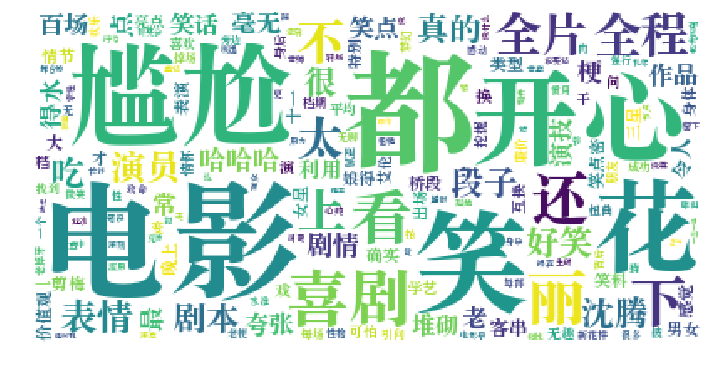

In [124]:
print('开心麻花')
fig = plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()